# 🌱 ***Data Augmentation*** 🌱
---
---
⠀

A regular problem, A regular problem, is the amount of data available to enter into the models, for these to present the expected results, it is necessary that training occur with a large amount of data (dataset), but on many occasions the necessary data to perform these tasks is not available.

⠀

This is where **Data Augmentation** comes in, which, as its name says, allows us to increase our dataset in *two ways*:


⠀
*   Introducing disturbances in the original data. For example:  taking an original image centered, replicating it off-center, inverting axes...

*   Using different distributions. For example: if we want to train a model to classify high resolution images, we add low resolution images, with noise, always maintaining the highest proportion of high resolution.




At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.



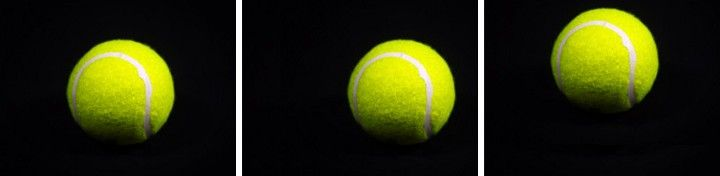



🎾 ***The same ball with some translations*** 🎾



⠀

So if we work with images, we only need to make some small alterations to our dataset and we can achieve our goal.

There are many ways to increase data with images, such as:

⠀

1.   Flip

2.   Rotation

1.   Scale

2.   Shear

1.   Translation

2.   Gaussian noise









## 🔺🔻 ***Keras*** 🔻🔺
---
---
⠀

The Keras library provides the ability to use automatic data augmentation when training a model.
This is achieved by using the ***ImageDataGenerator*** class.  It supports image formats: jpeg, png, bmp, gif  (Animated gifs will be truncated to the first frame).

⠀

#### 🥞 ***Functions that can be used with Keras:*** 🥞

⠀

+ ***image_dataset_from_directory:***  collection of datasets ready to use from image files in a directory.

+ ***load_img:*** Loads an image into PIL format.

+ ***img_to_array***: Converts a PIL Image instance to a Numpy array.



*For the explanation of the examples we will be working only with one image.*

In [3]:
import matplotlib.pyplot as plt                           #A library that allows you to graph, as in the style of MATLAB
import numpy as np                                        #Library that allows to work with matrix-arrangement  
from numpy import expand_dims                             #Expands the shape of the arrangement 
from keras.preprocessing.image import load_img            #From the Keras library for data augmentation, we load the image in the format of the python image library (PIL)
from keras.preprocessing.image import img_to_array        #It will take an image (PIL) and convert it into a matrix. If it starts from a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator  #class that takes original data, transforms it randomly and returns only the newly transformed data
from PIL import Image                                     #python image library
from urllib.request import urlopen                        #Allows to read an electronic address



⠀

🎈 A variety of techniques are supported, as well as pixel scaling methods, such as: 🎈

⠀

* ***width_shift_range*** and ***height_shift_range***: changes in the image (translations).

* ***horizontal_flip*** and ***vertical_flip***: flip the image horizontally and vertically.

* ***rotation_range***: Image rotations.

* ***brightness_range***:  Image Brightness.

* ***zoom_range***:Image zoom.

* ***rescale***: rescaling factor. We multiply the data by the value provided.

* ***shear_range***: Shear angle in counter-clockwise direction in degrees.

* ***validation_split***: Fraction of images reserved for validation (strictly between 0 and 1).

* ***fill_mode***: Points outside the boundaries of the input are filled according to the given mode:constant, nearest, wrap.
⠀

⠀

Let's look independently at examples of images after they have been enlarged. It is common to use a variety of magnification techniques at the same time during training.

⠀
***


⠀

💡 ***First we upload an image from the internet, in this case we introduce de url as follows:*** 💡

⠀

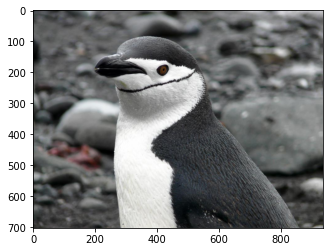

In [4]:
url = 'https://static.wikia.nocookie.net/reinoanimalia/images/a/aa/Pygoscelis_antarctica.jpg/revision/latest?cb=20190225182319&path-prefix=es'
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with an image shift that means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

⠀

The ImageDataGenerator constructor's arguments ***width_shift_range*** and ***height_shift_range*** control the amount of horizontal and vertical shift respectively.


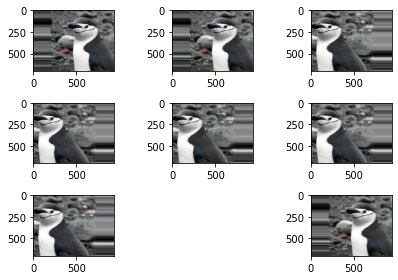

In [5]:
# We convert the image to an arrangement
data = img_to_array(img)

# We made an expansion to a sample 
samples = expand_dims(data, 0)

# We create the data booster using only image change 
datagen = ImageDataGenerator(width_shift_range=[-200,200])

# We prepare the iterator
it = datagen.flow(samples, batch_size=1)

# We generate samples and show the results
for i in range(9):
	plt.subplot(330 + 1 + i)
 
# Image batches are generated
	batch = it.next()
	image = batch[0].astype('uint8') #Is converted to a valid value so that it can be displayed as an image 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

⠀

An image rotation means reversing the rows or columns of pixels in the case of a vertical or horizontal rotation, respectively.

The augmentation is specified by a boolean argument **horizontal_flip** or **vertical_flip** for the class **ImageDataGenerator**.

⠀

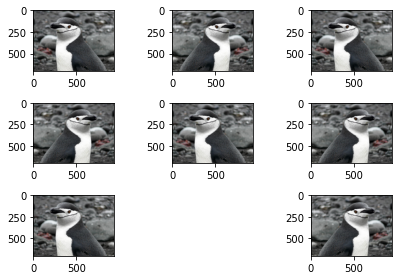

In [6]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is uniformly sampled at random from the zoom region for each dimension (width, height) separately.

⠀

Floating or [lower limit, upper limit]. Range for random zoom. If floating, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range].

⠀

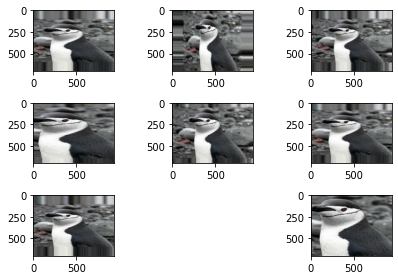

In [13]:
datagen = ImageDataGenerator(zoom_range=.5) #float or Range [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
 
plt.show()

⠀

The image is randomly rotated clockwise a set number of degrees from 0 to 360. This may rotate the pixels out of the image frame and leave areas of the frame without pixel data to be completed.

⠀

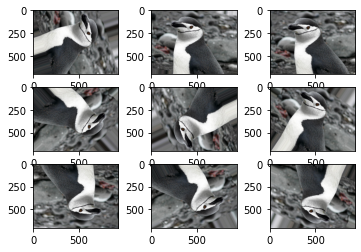

In [14]:
datagen = ImageDataGenerator(rotation_range=220)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

⠀

The combination of these techniques allows us to increase the amount of data from the dataset to be used, in many jobs an increase of data is used to increase the amount of training images and improve the accuracy of the work.

⠀


              🍰 featurewise_center: Boolean, set the average of each element to zero of all data.

              🍰 samplewise_center: Boolean, set the average of each sample to zero

              🍰 featurewise_std_normalization: Boolean, divide the entries by the standard deviation (std.) of the data set, according to the characteristics.

              🍰 samplewise_std_normalization: Boolean, divide each data by its std.

              🍰 zca_epsilon: The default value is 1e-6.
              
              🍰 zca_whitening: Boolean, indicates if ZCA bleaching is applied.      

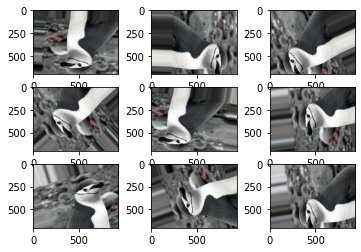

In [15]:
datagen = ImageDataGenerator(
            rotation_range               = 90,      
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

***

## ⠀

Now that we consider ***words***, the work required is not so simple given the inherent complexity of language (we cannot replace every word with its synonym and even if we do, we run the risk of the meaning of the sentence changing completely).

⠀

There are some libraries that can help us perform this task, we will start by analyzing the following ones:

⠀

1.   Text Attack
2.   Google Trans

##  👻 ***TextAttack*** 👻
***
***

⠀

It is a Python framework for opponent attacks, opponent training and NLP data augmentation. We will focus only on data augmentation.

In [7]:
!pip install textattack

     |████████████████████████████████| 327kB 3.3MB/s 
     |████████████████████████████████| 1.1MB 13.9MB/s 
     |████████████████████████████████| 686kB 21.4MB/s 
     |████████████████████████████████| 235kB 28.0MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 3.0MB 24.3MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 153kB 40.7MB/s 
     |████████████████████████████████| 102kB 14.0MB/s 
     |████████████████████████████████| 245kB 54.3MB/s 
     |████████████████████████████████| 317kB 41.6MB/s 
     |████████████████████████████████| 1.7MB 42.6MB/s 
     |████████████████████████████████| 778kB 58.1MB/s 
     |████████████████████████████████| 1.1MB 52.7MB/s 
     |████████████████████████████████| 890kB 47.1MB/s 
     |████████████████████████████████| 204kB 55.3MB/s 
     |████████████████████████████████| 245kB 58.5MB/s 
     |████████████████████████████████| 17.3MB 203kB/

In [8]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 04:00:34 INFO: Downloading default packages for language: en (English)...
2020-10-16 04:01:38 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [9]:
text = "I'm a blind lawyer with a history of incarceration and personal tragedy. What in that make-up makes you think I have a sense of humor?"

TextAttack provides four methods of data enhancement: 

* WordNetAugmenter

* EmbeddingAugmenter

* CharSwapAugmenter

* EasyDataAugmenter

***


### 🍃 WordNetAugmenter 🍃

***

⠀

**Increases the text by replacing it with synonyms from WordNet's Thesaurus (thesaurus).**

⠀

WordNet is a lexical database for English. Nouns, verbs, adjectives and adverbs are grouped in sets of cognitive synonyms (synsets), each of which expresses a different concept. WordNet superficially resembles a thesaurus, since it groups words according to their meaning.

⠀

In [10]:
aug = WordNetAugmenter();
aug.augment(text)

["I'm a unreasoning lawyer with a history of incarceration and personal tragedy. What in that make-up pee you think I have a sense of humor?"]

***
### 🍃 EmbeddingAugmenter 🍃
***

⠀

**Increases the text by transforming words with their inlays, with a restriction to ensure that their cosine similarity is at least 0.8.**

⠀

In [11]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:08<00:00, 53.7MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpmlav3z3b.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


["I'm a blind lawyer with a history of imprisonment and personal tragedy. What in that make-up makes you think I have a sense of mood?"]

***
### 🍃 CharSwapAugmenter 🍃
***

⠀

**Increase text by substituting, deleting, inserting and exchanging adjacent characters.**

⠀

In [12]:
aug = CharSwapAugmenter()
aug.augment(text)

["I'm a blind lawyer with a history of incareration and personal tragedy. What in that make-up makes you thiPk I have a sense of humor?"]

***
###  🍃 EasyDataAugmenter 🍃
***

⠀

**This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions.** 

⠀

All 4 of these features occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.

⠀

In [23]:
aug = EasyDataAugmenter()
aug.augment(text)

["I'm a blind lawyer with a history of incarceration and personal tragedy. What in that makes a you think I have make-up sense of humor?",
 "I'm a blind lawyer with a history of incarceration and create personal tragedy own. What in that make-up makes you think I have a sense of humor?",
 "I'm a blind lawyer with a chronicle of captivity and personal tragedy. What in that make-up makes you think I have a sense of humor?",
 "I'm a blind lawyer with history of incarceration personal tragedy. What in that make-up makes you think I have a sense of humor?"]

## 🌷 ***Googletrans*** 🌷
***
***

⠀

Googletrans uses Google Translate's Ajax API for language detection and translation.

⠀

The key parameters for the **translate ()** method are:

⠀

1.   **src**: source language. this parameter is optional since **googletrans** will detect it.

2.   **dest**: target language. Mandatory parameter.

1.   **text**: the text to be translated from the source language to the target language. Parameter required.

⠀

 

When using this method what happens is a retranslation, we go from the original language to a target language and then back to the original. During this retranslation, there is a slight change in the sentence between the original text and the retranslated text, but the general meaning of the sentence is still preserved.

⠀



***

**Supported languages can be found at https://cloud.google.com/translate/docs/languages?hl=es**

***

⠀

To get the best results it is recommended to make some tests with the languages, if the target language is very similar the translation does not lose information, however you can have the problem that the translation is too literal, this becomes a bit of a trial and error problem.


🍉***Some examples of languages:***🍉


*   Afrikáans	**'af'**

*   Chinese (simplified) 	**'zh-CN or zh'**

*   Esperanto	**'eo'**

*   Japanese	**'ja'**

*   Latin	**'la'**


*   Spanish	**'es'**


*   Turkmen	**'tk'**


*   Yiddish	**'yi'**

*   Zulu	**'zu'**



In [13]:
!pip install googletrans

     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 51kB 3.7MB/s 
     |████████████████████████████████| 972kB 4.8MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 102kB 6.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=ba100e7253a03642c97d3c43f6c068a10190d2608bc5d6c54ab46a63ca0ef545
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=b53ef014a6172d812e83be1bfd795ba13ccad5a5a8e3398f64fb35c36350bc71
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [14]:
from googletrans import Translator
translator = Translator()

In [15]:
origin_text = "I cannot see the light. So I must be the light."
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

I cannot see the light. So I must be the light.
光が見えません。だから私は光でなければなりません。
I can't see the light. So I have to be light.
